#Reconocimiento de imagenes

In [18]:
from sklearn.datasets import load_digits
import pylab as pl 

In [19]:
digits = load_digits() 

###Mostrar imagen del numero cero

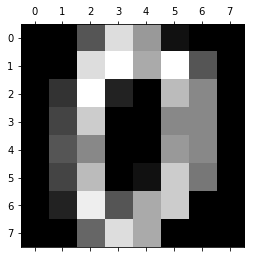

In [20]:
pl.gray()
pl.matshow(digits.images[0])    
pl.show()

###Mostrar la representacion en forma de matriz del numero cero

In [21]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

##Modelado de datos

### Supervised learning: classifying images of numbers

In [30]:
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import pylab as plt

#Seleccionar el target
y = digits.target

#Preparar los datos

n_samples = len(digits.images)
X= digits.images.reshape((n_samples, -1))

print(X)

#Dividir en un conjunto de prueba y conjunto de entrenamiento.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Seleccionar un clasificador Bayesiano Naïve Bayes
#Utilizar una distribución Gaussiana para estimar la probabilidad
gnb = GaussianNB()

#entrenar los datos
fit = gnb.fit(X_train,y_train)

#Realizar una prediccion para datos que no hayan sido entrenados
predicted = fit.predict(X_test)

#crear la matriz de confusion
confusion_matrix(y_test, predicted)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  7, 20,  2,  0,  0,  0,  0, 15,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  1,  5,  0],
       [ 0,  1,  0,  0, 31,  0,  0,  6,  0,  0],
       [ 0,  1,  0,  1,  0, 43,  0,  3,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 47,  0,  0],
       [ 0,  6,  0,  1,  0,  1,  0,  2, 38,  0],
       [ 0,  2,  0,  4,  1,  0,  0,  3,  7, 30]])

###Visually showing the predictions

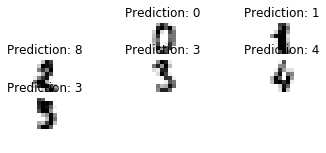

In [32]:
##almacenar la matriz de imagen numérica y su predicción (como un número) 
#juntos en una matriz
images_and_predictions = list(zip(digits.images, fit.predict(X)))

#Bucle a través de las primeras 7 imágenes
for index, (image, prediction) in enumerate(images_and_predictions[:6]):
##añadir una subtrama adicional en una cuadrícula de trama de 6 por 3. 
    plt.subplot(6, 3 ,index + 5)
    plt.axis('off')#no mostrar los ejes
    #mostrar imagen en escala de grises
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)#mostrar el valor de prediccion
plt.show()